# Question 1

### Part a)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
#load the dataset
df = pd.read_csv("/Users/akritisharma/Documents/shopify_dataScienceChallenge.csv")


In [21]:
#obtain summary statistics for order_amount
df['order_amount'].describe()

count      5002.000000
mean       3144.556003
std       41274.303492
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From the above summary statistics we see that the mean order amount is $3144.55. We also see that there is a wide range of values as described by the maximum and minimum, and that the median is a lot smaller than the mean. This indicates the presence of outliers and that it might be these outliers that are pulling the average order value up and away from the median. The samller median value is also indicative of skewed data. To confirm this, I let us look at the boxplot for this variable.

/Users/akritisharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


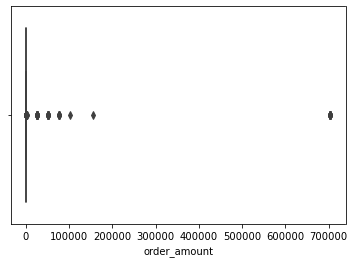

In [22]:
sns.boxplot(df["order_amount"])
plt.show()

In the above plot, we can barely see the box and only see outliers, thus confirming our hypothesis. Let us try and get a btter sense of the distribution of this variable by changing the scale of the x-axis

/Users/akritisharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


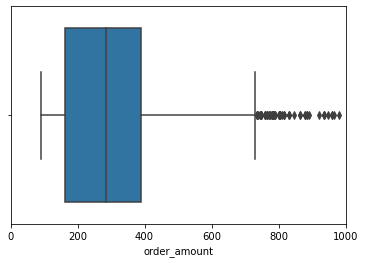

In [23]:
sns.boxplot(df["order_amount"])
plt.xlim(0, 1000)
plt.show()

From the above we see that the data contains quite a few outliers and that 50% of the orders are between 163 and
390. Since this data is heavily skewed and contains outliers of extremely large amounts, an average is not an appropriate measure of central tendency.

### Part b)

A more appropriate metric to capture the central point of this variable would be the median order value.

### Part c)

The median order value is $284. This is more reflective of the order of most values and not affected by the presence of very large outliers as much as the mean.

# Question 2

### Part a)

SELECT ShipperID, count(ShipperID) as ShipperID_Count  
FROM Orders  
GROUP by ShipperID  
LIMIT 1

**Based on the output table, ShipperID 1 i.e. Speedy Express had a total of 54 orders.**

### Part b)

SELECT *, COUNT(ord.EmployeeID) as employee_orders  
FROM Orders as ord  
JOIN Employees as emp  
ON ord.EmployeeID = emp.EMployeeID  
GROUP by ord.EmployeeID  
ORDER by employee_orders DESC  
LIMIT 1  
  
**Last Name of Employee with the most orders: Peacock**

### Part c)

SELECT *, SUM(odt.Quantity) as total_quantity  
FROM Orders as ord
JOIN OrderDetails as odt  
ON ord.OrderID = odt.OrderID  
JOIN Products as prd  
ON odt.ProductID = prd.ProductID  
JOIN Customers as cst  
ON ord.CustomerID = cst.CustomerID  
WHERE cst.Country = "Germany"  
GROUP by odt.ProductID, Country  
ORDER by total_quantity DESC
LIMIT 1  
  
**Boston Crab Meat was the most ordered product by customers in Germany.**